<h1 style='background:#565656; color:white'><center>⚽ Players from FIFA 23 ⚽</center><h1>

<h4> You can find the original dataset from Kaggle <a href="https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset">here</a>.</h4>

<center><img
src="https://www.fifaultimateteam.it/en/wp-content/uploads/2022/07/FIFA23-cover.webp" style="width:100%;height:100%;">
</center>

This notebook was made based on some other notebooks that I discovered in Kaggle:

* [FIFA in depth analysis with Linear Regression](https://www.kaggle.com/code/nitindatta/fifa-in-depth-analysis-with-linear-regression) by [Nitin Datta](https://www.kaggle.com/nitindatta)

* [FIFA-20 EDA & Comparison using Radar Charts](https://www.kaggle.com/code/ashaabrizvi/fifa-20-eda-comparison-using-radar-charts) by [Ashaab Rizvi](https://www.kaggle.com/ashaabrizvi)

* [Data Analysis (matplotlib animation)](https://www.kaggle.com/code/johntrunix/data-analysis-matplotlib-animation) by [John Trunix](https://www.kaggle.com/johntrunix)

* [Fifa19 analysis](https://www.kaggle.com/code/dczerniawko/fifa19-analysis/notebook) by [Daria Czerniawko](https://www.kaggle.com/dczerniawko)


# **Table of Contents**

<a id = 'max 10'></a>

* [1. Importing Libraries & Data](#1)

* [2. Getting a glimpse of the data](#2)

* [3. Data Manipulation & Cleaning](#3)

* [4. Data Analysis](#3)

   


# **1. Importing Libraries & Data** <a class="anchor" id="1"></a>

In [46]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.plotting.register_matplotlib_converters()

import calendar
import datetime as dt

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

from math import pi #Used in Radar Plots

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [2]:
#Data import

# players_fifa23 = pd.read_csv("../input/fifa-23-players-dataset/Fifa 23 Players Data.csv")
fifa23 = pd.read_csv("./data/Fifa 23 Players Data.csv")
fifa23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022,20,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50,44,50,41,38,41,40,36,40

# **2. Getting a glimpse of the data** <a class="anchor" id="2"></a>

In [3]:
fifa23.shape # 1. To check number of rows and columns

(18539, 89)

In [4]:
fifa23.info() # 2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [5]:
fifa23.describe # 3.

<bound method NDFrame.describe of              Known As           Full Name  Overall  Potential  Value(in Euro)  \
0            L. Messi        Lionel Messi       91         91        54000000   
1          K. Benzema       Karim Benzema       91         91        64000000   
2      R. Lewandowski  Robert Lewandowski       91         91        84000000   
3        K. De Bruyne     Kevin De Bruyne       91         91       107500000   
4           K. Mbappé       Kylian Mbappé       91         95       190500000   
...               ...                 ...      ...        ...             ...   
18534      D. Collins      Darren Collins       47         56          110000   
18535    Yang Dejiang        Dejiang Yang       47         57           90000   
18536       L. Mullan         Liam Mullan       47         67          130000   
18537    D. McCallion    Daithí McCallion       47         61          100000   
18538        N. Rabha         Nabin Rabha       47         50           600

In [40]:
fifa23.dtypes # 4. not necessary since we used the info function

Known As          object
Overall            int64
Potential          int64
Value(in Euro)     int64
Best Position     object
                   ...  
PositionRB         int64
PositionRM         int64
PositionRW         int64
PositionRWB        int64
PositionST         int64
Length: 95, dtype: object

In [6]:
columns = list(fifa23.columns)  # 5. To print all the columns
print(columns)

['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)', 'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats', 'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan', 'Preferred Foot', 'Weak Foot Rating', 'Skill Moves', 'International Reputation', 'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number', 'Attacking Work Rate', 'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Visio

In [39]:
nullCol = list(fifa23.isna().sum())  # 6. Check for null values in each column
print(nullCol)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [51]:
nullCol = list(fifa23.isnull().sum())  # 7. Same function as above
print(nullCol)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


There are no NaN values in the dataset.

## data cleaning TEST

<AxesSubplot: >

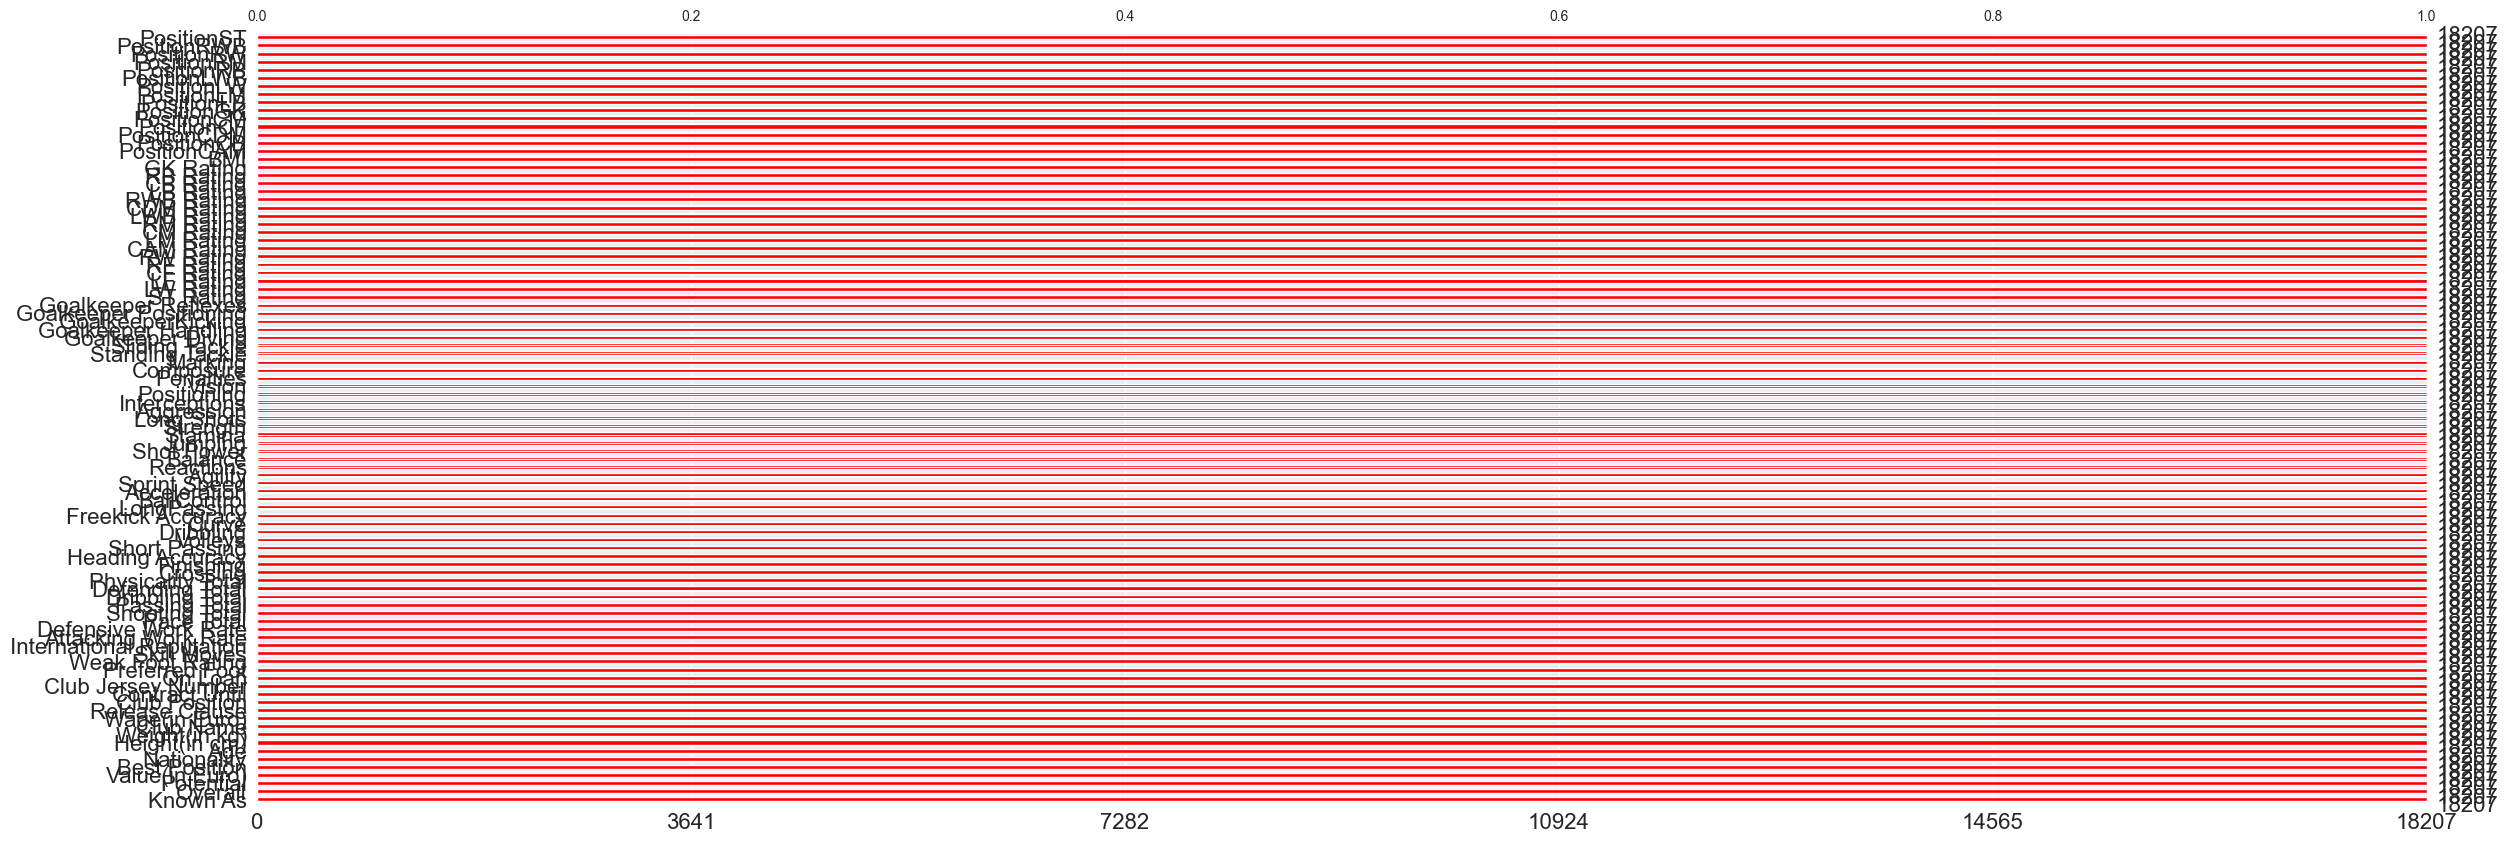

In [49]:
msno.bar(fifa23.sample( 18207 ),(28,10),color='red')


#### Indexing the data

In [8]:
best10 = fifa23.loc[:9, ['Known As', 'Overall', 'Nationality']]
best10

,Known As,Overall,Nationality
0,L. Messi,91,Argentina
1,K. Benzema,91,France
2,R. Lewandowski,91,Poland
3,K. De Bruyne,91,Belgium
4,K. Mbappé,91,France
5,M. Salah,90,Egypt
6,T. Courtois,90,Belgium
7,M. Neuer,90,Germany
8,Cristiano Ronaldo,90,Portugal
9,V. van Dijk,90,Netherlands


In [9]:
#reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

fifa23.loc[(fifa23["Best Position"] == 'CAM') & (fifa23["Nationality"] == "France")]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
61,C. Nkunku,Christopher Nkunku,86,89,94000000,"CF,CAM,ST",CAM,France,https://cdn.sofifa.net/players/232/411/23_60.png,24,175,73,2196,471,RB Leipzig,90000,166900000,CAM,2024,18,2019,-,Right,3,5,3,France,https://cdn.sofifa.net/flags/fr.png,SUB,12,High,Medium,88,81,83,88,65,66,81,86,61,85,70,89,82,80,80,88,87,89,88,85,90,79,59,78,64,78,59,67,86,85,67,81,62,69,59,5,6,10,15,7,85,86,85,85,85,86,89,89,86,89,80,77,80,77,70,77,20
66,N. Fekir,Nabil Fekir,85,85,54500000,CAM,CAM,France,https://cdn.sofifa.net/players/216/594/23_60.png,28,173,75,2126,452,Real Betis Balompié,48000,114500000,CAM,2026,8,2019,-,Left,4,4,3,-,https://cdn.sofifa.net/flags/fr.png,-,-,High,Medium,83,82,82,87,38,80,81,83,49,83,77,89,83,79,77,86,88,79,85,81,91,84,64,80,81,83,79,34,82,87,74,89,34,42,30,15,9,8,14,15,83,84,84,84,84,84,85,85,82,85,67,66,67,63,56,63,23
179,T. Lemar,Thomas Lemar,83,86,47000000,"CM,LM,RM",CAM,France,https://cdn.sofifa.net/players/213/565/23_60.png,26,171,66,2215,462,Atlético de Madrid,74000,99900000,SUB,2023,11,2018,-,Left,3,4,3,-,https://cdn.sofifa.net/flags/fr.png,-,-,High,High,82,78,83,87,68,64,82,77,54,84,77,88,85,81,80,86,84,81,90,82,85,79,68,80,56,79,63,78,81,85,69,80,55,77,69,11,15,13,7,14,80,83,82,82,82,83,86,86,86,86,81,79,81,79,72,79,23
191,A. Griezmann,Antoine Griezmann,83,83,30500000,"ST,CF,RW",CAM,France,https://cdn.sofifa.net/players/194/765/23_60.png,31,176,73,2235,454,Atlético de Madrid,185000,0,SUB,2023,8,2019,TRUE,Left,3,4,4,France,https://cdn.sofifa.net/flags/fr.png,CAM,7,Medium,Medium,80,82,83,85,52,72,83,82,83,81,85,84,86,85,80,85,79,80,90,85,83,82,88,85,64,81,73,49,88,85,79,89,43,54,50,14,8,14,13,14,83,83,83,83,83,83,83,83,83,83,73,71,73,71,65,71,23
253,D. Payet,Dimitri Payet,82,82,12500000,"CAM,LW,ST",CAM,France,https://cdn.sofifa.net/players/177/388/23_60.png,35,175,77,2015,420,Olympique de Marseille,40000,23800000,LF,2024,10,2017,-,Right,4,4,3,-,https://cdn.sofifa.net/flags/fr.png,-,-,High,Medium,70,78,84,83,40,65,85,75,59,83,76,84,83,81,80,85,71,69,81,79,74,82,34,67,71,80,54,37,82,87,81,83,38,37,39,11,15,9,14,12,80,81,80,80,80,81,82,82,80,82,66,65,66,62,54,62,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17578,M. Douane,Maïdine Douane,54,68,250000,CAM,CAM,France,https://cdn.sofifa.net/players/266/486/23_60.png,19,175,72,1398,292,FC Metz,750,606000,RES,2023,35,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/fr.png,-,-,Medium,Medium,59,47,53,60,27,46,53,45,34,51,44,62,52,49,55,60,59,59,55,51,69,55,51,49,44,47,46,22,41,54,51,61,25,29,27,15,7,14,10,13,51,54,53,53,53,54,56,56,52,

In [10]:
#reviews.loc[reviews.country.isin(['Italy', 'France'])]

fifa23.loc[fifa23["Nationality"].isin(['Italy', 'France'])]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
19,N. Kanté,N'Golo Kanté,89,89,72000000,"CDM,CM",CDM,France,https://cdn.sofifa.net/players/215/914/23_60.png,31,168,70,2154,462,Chelsea,220000,133199999,CM,2023,7,2016,-,Right,3,2,4,France,https://cdn.sofifa.net/flags/fr.png,CDM,13,Medium,High,72,66,74,81,87,82,68,65,54,82,56,78,49,49,76,81,77,68,78,93,92,71,75,95,72,65,93,91,72,77,54,84,90,93,86,15,12,10,7,10,75,76,76,76,76,76,80,81,84,81,87,89,87,87,87,87,23
22,G. Donnarumma,Gianluigi Donnarumma,88,92,103500000,GK,GK,Italy,https://cdn.sofifa.net/players/230/621/23_60.png,23,196,90,1375,478,Paris Saint-Germain,110000,199200000,GK,2026,99,2021,-,Right,3,1,3,Italy,https://cdn.sofifa.net/flags/it.png,GK,21,Medium,Medium,90,83,79,89,52,85,12,12,12,36,8,28,12,14,34,30,50,55,64,85,38,59,72,34,72,18,30,26,14,60,24,65,20,14,16,90,83,79,85,89,37,34,36,36,36,34,41,38,40,38,34,37,34,34,34,34,89
33,H. Lloris,Hugo Lloris,87,87,9000000,GK,GK,France,https://cdn.sofifa.net/players/167/948/23_60.png,35,188,82,1399,478,Tottenham Hotspur,80000,17100000,GK,2024,1,2012,-,Left,1,1,4,France,https://cdn.sofifa.net/flags/fr.png,GK,1,Medium,Medium,88,83,74,88,61,84,13,10,9,54,15,12,12,10,55,29,61,62,54,84,56,56,74,41,43,14,31,25,9,59,40,59,24,12,18,88,83,74,84,88,34,33,35,35,35,33,42,40,44,40,37,41,37,36,32,36,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,M. Nasti,Marco Nasti,52,67,190000,ST,ST,Italy,https://cdn.sofifa.net/players/270/614/23_60.png,18,179,72,1321,265,Cosenza,500,413000,RES,2024,20,2021,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/it.png,-,-,Medium,Medium,52,54,43,51,24,41,39,56,51,49,49,46,58,39,32,54,50,54,58,56,65,55,58,41,39,51,44,22,53,41,51,49,19,24,18,10,13,8,12,6,54,50,51,51,51,50,51,50,46,50,39,38,39,38,36,38

In [11]:
fifa23["Nationality"].describe()

count       18539
unique        160
top       England
freq         1632
Name: Nationality, dtype: object

In [12]:
fifa23["Nationality"].value_counts()

England          1632
Germany          1204
Spain            1074
France            963
Argentina         937
                 ... 
Bermuda             1
Kazakhstan          1
Liechtenstein       1
Korea DPR           1
Barbados            1
Name: Nationality, Length: 160, dtype: int64

In [13]:
fifa23.groupby(['Nationality'])["Overall"].agg([len, min, max])

,len,min,max
Nationality,,,
Afghanistan,1,63,63
Albania,52,51,79
Algeria,58,53,86
Andorra,1,62,62
Angola,20,57,79
...,...,...,...
Venezuela,197,52,78
Vietnam,1,66,66
Wales,164,50,81


In [15]:
# convert a column to another type
# f23["Age"].astype('float64')

In [16]:
# f23["Acceleration"].fillna("Unknown")

# **3. Data Manipulation & Cleaning** <a class="anchor" id="3"></a>

In [17]:
useless_column = ['Full Name', 'Image Link', 'TotalStats', 'BaseStats' , 'Joined On', 'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number'] 

In [18]:
fifa23 = fifa23.drop(useless_column, axis = 1)

In [19]:
fifa23['BMI'] = fifa23 ['Weight(in kg)'] / (fifa23['Height(in cm)'] / 100) ** 2

In [20]:
fifa23[['Known As','Positions Played']]

,Known As,Positions Played
0,L. Messi,RW
1,K. Benzema,"CF,ST"
2,R. Lewandowski,ST
3,K. De Bruyne,"CM,CAM"
4,K. Mbappé,"ST,LW"
...,...,...
18534,D. Collins,"ST,RM"
18535,Yang Dejiang,CDM
18536,L. Mullan,CM
18537,D. McCallion,CB


In [21]:
new_player_position = fifa23['Positions Played'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()

,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [22]:
fifa23 =  pd.concat([fifa23,new_player_position],axis = 1)


In [23]:
fifa23.head()

,Known As,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,BMI,PositionCAM,PositionCB,PositionCDM,PositionCF,PositionCM,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,99900000,RW,2023,30,-,Left,4,4,5,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,23.458562,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,131199999,CF,2023,9,-,Right,4,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,23.666910,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,172200000,ST,2025,9,-,Right,4,4,5,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,23.666910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,198900000,CM,2025,17,-,Right,5,4,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,21.366869,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,366700000,ST,2024,7,-,Right,4,5,4,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,22.038401,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [24]:
fifa23 =  fifa23.drop('Positions Played',axis=1)


In [25]:
columns = ['Pace Total','Shooting Total','Passing Total','Dribbling Total','Defending Total','Physicality Total']

In [26]:
fifa23[columns]

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total
0,81,89,90,94,34,64
1,80,88,83,87,39,78
2,75,91,79,86,44,83
3,74,88,93,87,64,77
4,97,89,80,92,36,76
...,...,...,...,...,...,...
18534,68,48,43,51,31,33
18535,55,37,41,47,48,39
18536,64,40,49,52,37,35
18537,52,24,25,32,52,41


In [27]:
fifa23[columns].isnull().sum()

Pace Total           0
Shooting Total       0
Passing Total        0
Dribbling Total      0
Defending Total      0
Physicality Total    0
dtype: int64

# **4. Data Analysis** <a class="anchor" id="4"></a>

In [28]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(fifa23['Nationality'].nunique()))
print(fifa23['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 160
England      1632
Germany      1204
Spain        1074
France        963
Argentina     937
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [29]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(fifa23['Club Name'].nunique()))
print(fifa23['Club Name'].value_counts().head(5))

Total number of clubs : 679
Free agent                 92
Olympique de Marseille     35
Wolverhampton Wanderers    34
RC Celta de Vigo           34
Real Madrid CF             34
Name: Club Name, dtype: int64


In [30]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(fifa23.loc[fifa23['Potential'].idxmax()][0]))
print('Maximum Overall Performance : '+str(fifa23.loc[fifa23['Overall'].idxmax()][0]))

Maximum Potential : K. Mbappé
Maximum Overall Performance : L. Messi


In [31]:
pr_cols=['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeper Diving',
       'Goalkeeper Handling', ' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],fifa23.loc[fifa23[pr_cols[i]].idxmax()][0]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : R. Lewandowski
Best Heading Accuracy : L. de Jong
Best Short Passing : K. De Bruyne
Best Volleys : L. Martínez
Best Dribbling : L. Messi
Best Curve : L. Messi
Best Freekick Accuracy : J. Ward-Prowse
Best LongPassing : K. De Bruyne
Best BallControl : Neymar Jr
Best Acceleration : K. Mbappé
Best Sprint Speed : K. Mbappé
Best Agility : Bernardo Silva
Best Reactions : Cristiano Ronaldo
Best Balance : L. Messi
Best Shot Power : E. Haaland
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : T. Chorý
Best Long Shots : L. Messi
Best Aggression : R. Kent
Best Interceptions : N. Kanté
Best Positioning : T. Müller
Best Vision : L. Messi
Best Penalties : H. Kane
Best Composure : L. Messi
Best Marking : V. van Dijk
Best Standing Tackle : N. Kanté
Best Sliding Tackle : A. Wan-Bissaka
Best Goalkeeper Diving : G. Donnarumma
Best Goalkeeper Handling : J. Oblak
Best  GoalkeeperKicki

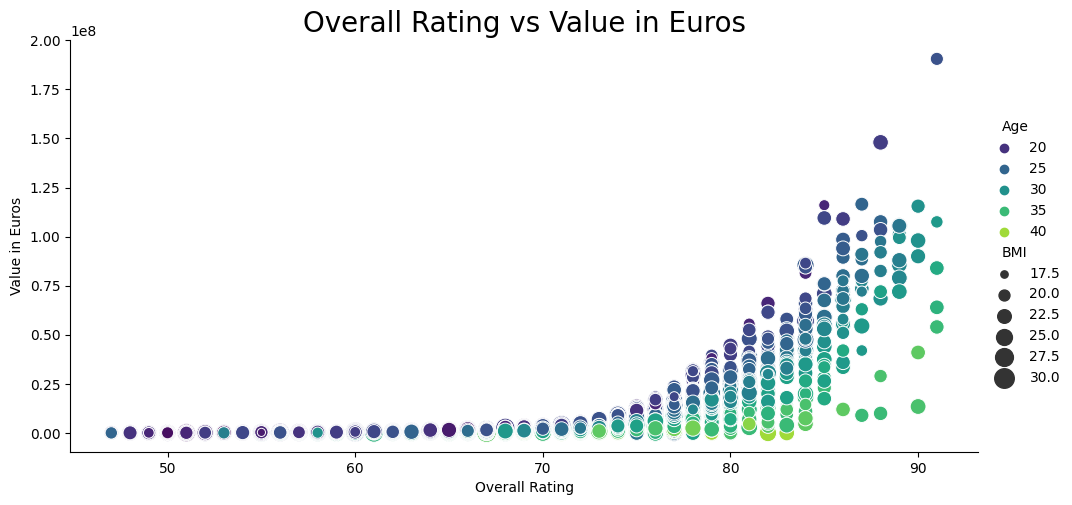

In [32]:
sns.relplot(x='Overall',y='Value(in Euro)',hue='Age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa23)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

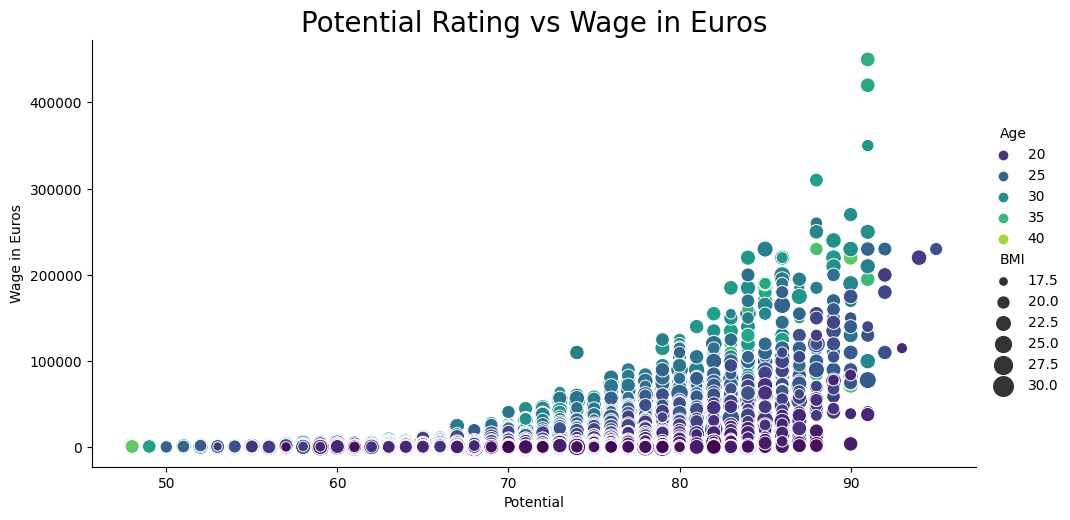

In [33]:
sns.relplot(x='Potential',y='Wage(in Euro)',hue='Age',palette = 'viridis',size="BMI", sizes=(15, 200),aspect=2,data=fifa23)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

In [35]:
plt.figure(dpi=125)
sns.countplot('Preferred Foot',data=fifa23,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=fifa23['Preferred Foot'].value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

TypeError: countplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

In [36]:
plt.figure(dpi=125)
sns.countplot('International Reputation',data=fifa23.head(100),palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

TypeError: countplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

/var/folders/qc/g5xhyz8n6d3_ssz3q8pgplj00000gn/T/ipykernel_18317/51847783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=fifa23['Age'],kde=False,bins=20,color='red')


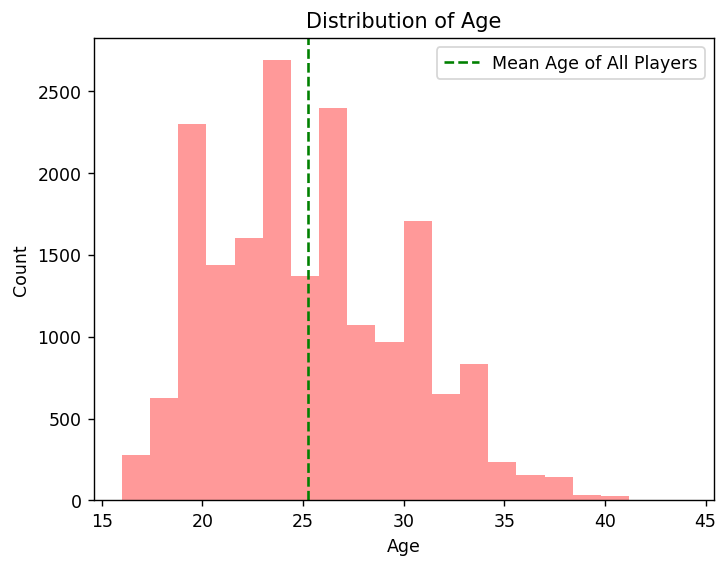

In [37]:
plt.figure(dpi=125)
sns.distplot(a=fifa23['Age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(fifa23['Age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

/var/folders/qc/g5xhyz8n6d3_ssz3q8pgplj00000gn/T/ipykernel_18317/3453076675.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=fifa23['BMI'],kde=False,bins=20,color='green')


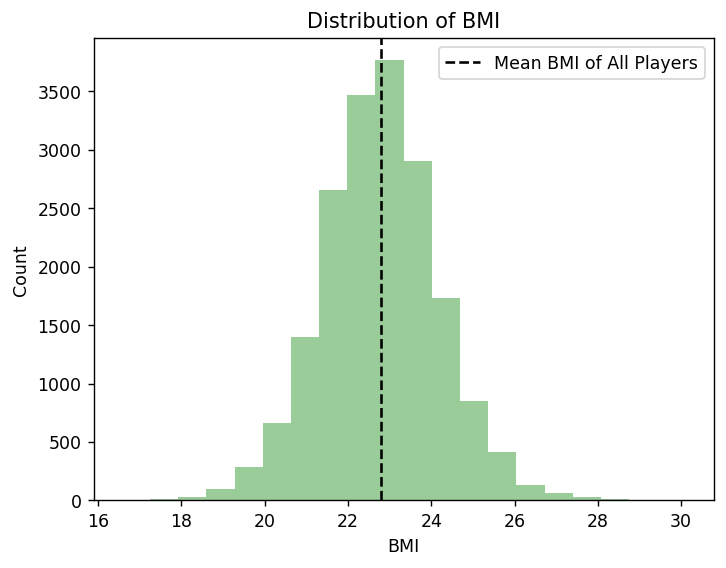

In [38]:
plt.figure(dpi=125)
sns.distplot(a=fifa23['BMI'],kde=False,bins=20,color='green')
plt.axvline(x=np.mean(fifa23['BMI']),c='black',ls='--',label='Mean BMI of All Players')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

In [ ]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa23['Weight(in kg)']
y=fifa23['Pace Total']

sns.regplot(x,y,color='orange')
plt.title('Weight vs Pace',fontsize = 20)
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

In [ ]:
plt.figure(figsize=(12,6),dpi=125)
x=fifa23['BMI']
y=fifa23['Pace Total']

sns.regplot(x,y,color='skyblue')
plt.title('BMI vs Pace',fontsize=20)
plt.xlabel('BMI')
plt.ylabel('Pace')
plt.show()

In [ ]:
#Top earners
print('Most valued player : '+str(fifa23.loc[fifa23['Value(in Euro)'].idxmax()][0]))
print('Highest earner : '+str(fifa23.loc[fifa23['Wage(in Euro)'].idxmax()][0]))
print("--"*40)
print("\nTop Earners")

# **3.1 - Top 20 Analysis** <a class="anchor" id="4"></a>

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot(x='Nationality',data=fifa23.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.countplot('Club Name',data=fifa23.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('Club Position',data=fifa23.head(20),palette='CMRmap')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?',fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize=(14,7),dpi=125)
sns.countplot('Age',data=fifa23.head(20),palette='Blues')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)
plt.show()

# **3.2 - The Biggest Rivalry - Messi VS Benzema**<a class="anchor" id="5"></a> 

In [ ]:
column_r=['Known As','Overall','Potential','Pace Total','Shooting Total','Passing Total','Dribbling Total','Defending Total','Physicality Total']
rival = fifa23.head(2)[column_r]
rival= rival.set_index('Known As')
rival.head()

In [ ]:
values = rival.iloc[0].tolist()
values += values [:1]
values

In [ ]:
values2 = rival.iloc[1].tolist()
values2 += values2[:1]
values2

In [ ]:
def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,values)
    ax.fill(angles, values, 'teal', alpha=0.1)

    ax.plot(angles2,values2)
    ax.fill(angles2, values2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

In [ ]:
RadarChart("Messi",[91, 91, 81, 89, 90, 94, 34, 64, 91],"Benzema",[91, 91, 80, 88, 83, 87, 39, 78, 91])

**Insights:**
Out of 8 attributes - **Messi performed well in 5** and **Ronaldo in 3**

<img src= "https://media1.giphy.com/media/TjAcxImn74uoDYVxFl/200w.webp?cid=ecf05e47ohf8grax3pqbkyqlg3nbmlkid6a7hde9kosfzlkx&rid=200w.webp">

# **3.3 - Some other Top Class Comparisons**<a class="anchor" id="6"></a>

In [ ]:
column_r=['Known As','Age','Club Position','Overall','Potential','Pace Total','Shooting Total','Passing Total','Dribbling Total','Defending Total','Physicality Total']
riv = fifa23[column_r]
riv = riv.set_index(['Known As','Club Position','Age'])

In [ ]:
def Radarchart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * pi for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * pi for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,value)
    ax.fill(angles, value, 'teal', alpha=0.1)

    ax.plot(angles2,value2)
    ax.fill(angles2, value2, 'red', alpha=0.1)
    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()

In [ ]:
fifa23.head(25)

Now let's compare top two Midfielders as per the dataset i.e **De Bryne** and **Casemiro**

In [ ]:
# Let's find values for De Bryne - Man City's Midfielder
value = riv.iloc[3].tolist()
value += value[:1]
value

In [ ]:
# Let's find values for Modric - Madrid's Midfielder
value2 = riv.iloc[13].tolist()
value2 += value2[:1]
value2

In [ ]:
Radarchart("De Bryne", [91, 91, 74, 88, 93, 87, 64, 77, 91],"Casemiro",[89, 89, 63, 73, 75, 72, 87, 90, 89])

<img src="https://media3.giphy.com/media/l0HlGbzmlTORWvmYo/200w.webp?cid=ecf05e47fe28lkkh6bvz6u9gc0xwgxnf6jiyjwq8b6e64h49&rid=200w.webp">

Now let's compare top two Defenders of current era as per me i.e **Rúben Dias** and **Van Dijk**

In [ ]:
# Let's find values for Rúben Dias - City's Defender
value = riv.iloc[20].tolist()
value += value[:1]
value

In [ ]:
# Let's find values for Van Dijk - Liverpools's Defender
value2 = riv.iloc[9].tolist()
value2 += value2[:1]
value2

In [ ]:
Radarchart("Rúben Dias",[88, 91, 63, 39, 66, 68, 88, 88, 88] ,"Van Dijk", [90, 90, 81, 60, 71, 72, 91, 86, 90])

<img src="https://media0.giphy.com/media/gIeVrITp1dnLrtJINn/200w.webp?cid=ecf05e47qrlur0yn6weaopqy6mwz7zsdr0ddifn91ojtduqw&rid=200w.webp">

Now let's compare top two Strikers as per the dataset i.e **Kane** and **Aguero**

In [ ]:
# Let's find values for Kane - Tottenham's Striker
value = riv.iloc[12].tolist()
value += value[:1]
value

In [ ]:
# Let's find values for Aguero - Man City's Striker
value2 = riv.iloc[17].tolist()
value2 += value2[:1]
value2

In [ ]:
Radarchart("Kane",[89.0, 91.0, 70.0, 91.0, 79.0, 81.0, 47.0, 83.0, 89.0],"Aguero",[89.0, 89.0, 80.0, 90.0, 77.0, 88.0, 33.0, 74.0, 89.0])

## 4. Exploratory Data Analysis

In [ ]:
sns.jointplot(x=fifa23['Age'],y=fifa23['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

# **3.4 - Word Clouds**<a class="anchor" id="7"></a>

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa23.head(20)['Club Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa23.head(20)['Nationality']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
plt.subplots(dpi=150)
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa23.head(10)['Known As']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2 style='background:white; border:0; color: #565656'><center>Thank You for reading until the end!</center><h2>

<img src ="https://media0.giphy.com/media/4PSESiw3VaSStOrPtq/200w.webp?cid=ecf05e4709o3p4kyc2t4w00xqhnfw0x78htw5xijisvom3e6&rid=200w.webp">